In [12]:
import pandas as pd
import numpy as np

In [13]:
%load_ext autoreload
%autoreload 2
%pdb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned OFF


In [14]:
if os.name == 'nt':
    base_dir = 'C:/Users/{}/'.format(os.getlogin())
    base_dir += 'Documents/ACF_consulting/'
else:
    base_dir = '/home/student.unimelb.edu.au/shorte1/Documents/'
    base_dir += 'ACF_consulting'

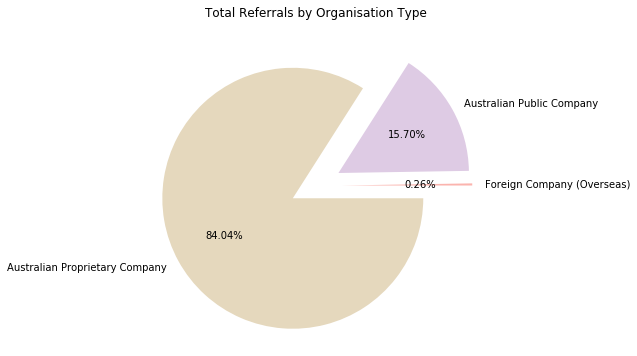

In [120]:
fig_app, ax_app = plt.subplots(figsize=(10, 6))
theme = plt.get_cmap('Pastel1')
ax_app.set_prop_cycle("color", [theme(1. * i / len(holder_counts))
                             for i in range(len(holder_counts))])
plt.pie(holder_counts, labels=holder_labels, autopct='%1.2f%%', explode=[.2,.2,.2])
plt.title('Total Referrals by Organisation Type')

plt.savefig(base_dir + '/example_figure.pdf', format='pdf')

# fig_ASIC, ax_ASIC = plt.subplots(figsize=(6, 6))
# theme = plt.get_cmap('Pastel1')
# ax_ASIC.set_prop_cycle("color", [theme(1. * i / len(totals))
#                              for i in range(len(totals))])
# ax_pie.set_prop_cycle("color", [theme(1. * i / len(totals))
#                              for i in range(len(types))])
# plt.pie(totals, labels=types, autopct='%1.2f%%', explode=[.2]*len(types))